# Importing Libraries and data

In [85]:
import pandas as pd

try:
    train_df = pd.read_csv('/Users/donglinxiong/Documents/i-drive/Desktop/kagglex-cohort4/train.csv')
    test_df = pd.read_csv("/Users/donglinxiong/Documents/i-drive/Desktop/kagglex-cohort4/test.csv")

    print("Training Data Columns:", train_df.columns)
    print("Test Data Columns:", test_df.columns)
except Exception as e:
    print(f"Error reading files: {e}")


Training Data Columns: Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')
Test Data Columns: Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title'],
      dtype='object')


#Learning about the data

In [86]:
def get_dataset_summary(df):
    summary = {
        'Number of Rows': df.shape[0],
        'Number of Columns': df.shape[1],
        'Missing Values': df.isnull().sum().sum(),
        'Duplicates': df.duplicated().sum(),
        'Memory Usage (bytes)': df.memory_usage().sum(),
        'Unique Values': df.nunique().to_dict()
    }
    return summary


try:
    train_summary = get_dataset_summary(train_df)
    test_summary = get_dataset_summary(test_df)

    summary_df = pd.DataFrame([train_summary, test_summary], index=['train', 'test'])

    print("Dataset Summary:\n", summary_df)
except Exception as e:
    print(f"Error generating summary: {e}")


Dataset Summary:
        Number of Rows  Number of Columns  Missing Values  Duplicates  \
train           54273                 13            1722           0   
test            36183                 12            1158           0   

       Memory Usage (bytes)                                      Unique Values  
train               5644524  {'id': 54273, 'brand': 53, 'model': 1827, 'mod...  
test                3473700  {'id': 36183, 'brand': 53, 'model': 1791, 'mod...  


# Data Cleaning 

## locate missing value columns

In [87]:
# Check for missing values in train_df
missing_train = train_df.isnull().sum()
columns_with_missing_train = missing_train[missing_train > 0].index.tolist()
print("Columns with missing values in train_df:", columns_with_missing_train)

# Check for missing values in test_df
missing_test = test_df.isnull().sum()
columns_with_missing_test = missing_test[missing_test > 0].index.tolist()
print("Columns with missing values in test_df:", columns_with_missing_test)


Columns with missing values in train_df: ['fuel_type', 'engine', 'transmission', 'ext_col', 'int_col']
Columns with missing values in test_df: ['fuel_type', 'engine', 'transmission', 'ext_col', 'int_col']


## handle missing values 


In [90]:
# Fill missing values in train_df
train_df.ffill(inplace=True)  # Fill forward
train_df.bfill(inplace=True)  # Fill backward if there are still NaNs left

# Fill missing values in test_df
test_df.ffill(inplace=True)  # Fill forward
test_df.bfill(inplace=True)  # Fill backward if there are still NaNs left


In [93]:
# Verify if all missing values are filled in train_df
missing_train = train_df.isnull().sum().sum()
print("Total missing values in train_df after filling:", missing_train)

# Verify if all missing values are filled in test_df
missing_test = test_df.isnull().sum().sum()
print("Total missing values in test_df after filling:", missing_test)


Total missing values in train_df after filling: 0
Total missing values in test_df after filling: 0


## Handling columns (remove and add columns)

In [96]:
# Remove unwanted columns from train_df
train_df.drop(columns=['ext_col', 'int_col', 'clean_title'], inplace=True)

# Remove unwanted columns from test_df
test_df.drop(columns=['ext_col', 'int_col', 'clean_title'], inplace=True)


KeyError: "['ext_col', 'int_col', 'clean_title'] not found in axis"

In [99]:
# Add a new column to the Test_df dataset with a value of 0
test_df['price'] = 0

In [101]:
# Verify if the columns are removed from train_df
print("Columns in train_df after removal:", train_df.columns)
print("Columns in test_df after removal:", test_df.columns)

Columns in train_df after removal: Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'accident', 'price'],
      dtype='object')
Columns in test_df after removal: Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'accident', 'price'],
      dtype='object')


## Handling variables in columns equal features in train and test datasets


In [105]:

print("This is a summary of the train dataset: ", get_dataset_summary(train_df))

This is a summary of the train dataset:  {'Number of Rows': 54273, 'Number of Columns': 10, 'Missing Values': 0, 'Duplicates': 0, 'Memory Usage (bytes)': 4341972, 'Unique Values': {'id': 54273, 'brand': 53, 'model': 1827, 'model_year': 34, 'milage': 3212, 'fuel_type': 6, 'engine': 1060, 'transmission': 45, 'accident': 2, 'price': 1481}}


In [106]:
print("This is a summary of the test dataset: ", get_dataset_summary(test_df))


This is a summary of the test dataset:  {'Number of Rows': 36183, 'Number of Columns': 10, 'Missing Values': 0, 'Duplicates': 0, 'Memory Usage (bytes)': 2894772, 'Unique Values': {'id': 36183, 'brand': 53, 'model': 1791, 'model_year': 34, 'milage': 2973, 'fuel_type': 6, 'engine': 1037, 'transmission': 43, 'accident': 2, 'price': 1}}


In [107]:
import pandas as pd

# Assuming train_df and test_df are your training and test dataframes

# Identify unique categories in the test set
missing_models = set(test_df['model']).difference(set(train_df['model']))
missing_engines = set(test_df['engine']).difference(set(train_df['engine']))
missing_transmissions = set(test_df['transmission']).difference(set(train_df['transmission']))

# Create dummy rows for the missing categories
dummy_rows = []
for model in missing_models:
    dummy_rows.append({'model': model, 'price': train_df['price'].mean()})
for engine in missing_engines:
    dummy_rows.append({'engine': engine, 'price': train_df['price'].mean()})
for transmission in missing_transmissions:
    dummy_rows.append({'transmission': transmission, 'price': train_df['price'].mean()})

# Convert the list of dictionaries to a DataFrame
dummy_df = pd.DataFrame(dummy_rows)

# Append the dummy rows to the training data
train_df = pd.concat([train_df, dummy_df], ignore_index=True)

# Proceed with the model training


In [115]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming train_df and test_df are your training and test dataframes

# List of categorical columns to encode
categorical_columns = ['brand', 'model', 'fuel_type', 'engine', 'transmission', 'accident']

# Initialize the label encoder for each categorical column
label_encoders = {column: LabelEncoder() for column in categorical_columns}

# Combine train and test data to ensure consistent encoding
combined_df = pd.concat([train_df, test_df], keys=['train', 'test'])

# Apply label encoding to each categorical column
for column in categorical_columns:
    combined_df[column] = label_encoders[column].fit_transform(combined_df[column])

# Separate the combined dataframe back into train and test dataframes
train_df = combined_df.xs('train').copy()
test_df = combined_df.xs('test').copy()

# Replace 'model_year' with 'model_age' in both train and test data
train_df['model_age'] = 2024 - train_df['model_year']
test_df['model_age'] = 2024 - test_df['model_year']

# Drop the 'model_year' column
train_df = train_df.drop(columns=['model_year'])
test_df = test_df.drop(columns=['model_year'])

# Ensure that the target variable (price) is not encoded in the test data
# Assuming 'price' is the target variable in the training data and needs to be excluded from the test data
#test_df.loc[:, 'price'] = None  # Placeholder, as 'price' in test data should be unknown or not present

# Drop the target variable from the test data if it was added as a placeholder
#test_df = test_df.drop(columns=['price'])

# Now train_df and test_df have the same categorical variables encoded consistently
train_df['price/milage'] = train_df['price'] / train_df['milage']
train_df['price/year'] = train_df['price'] / train_df['model_year']

test_df['price/milage'] = 0
test_df['price/year'] = 0
test_df['price'] = 0

# Saving the processed train and test DataFrames to CSV files
train_df.to_csv('/Users/donglinxiong/Documents/i-drive/Desktop/kagglex-cohort4/Tuesday/clean_train_with_ratios.csv',
                index=False)
test_df.to_csv('/Users/donglinxiong/Documents/i-drive/Desktop/kagglex-cohort4/Tuesday/clean_test_with_ratios.csv',
               index=False)

# Display the cleaned DataFrames
print("Clean Train DataFrame with Ratios:")
print(train_df.head())

print("\nClean Test DataFrame with Ratios:")
print(test_df.head())

/var/folders/s5/khp0yllx5vzfw75znst21wc80000gn/T/ipykernel_1859/2434165347.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat([train_df, test_df], keys=['train', 'test'])


KeyError: 'model_year'

## Calculate columns , mode_age, price/mileage, price/year

## Identify and cap outliers in the price column each brand and year

## identify and cap outliers in mileage, price/year and price/mileage both dataset


## Label encoding of categorical columns into numerical columns


In [16]:
import pandas as pd

# Load the datasets
test_df = pd.read_csv('/Users/donglinxiong/Documents/i-drive/Desktop/kagglex-cohort4/Tuesday/test_cleaned.csv')
train_df = pd.read_csv('/Users/donglinxiong/Documents/i-drive/Desktop/kagglex-cohort4/Tuesday/train_cleaned.csv')

# Ensure all columns are numeric
test_df = test_df.apply(pd.to_numeric, errors='coerce')
train_df = train_df.apply(pd.to_numeric, errors='coerce')

# Format the datasets as tables
test_table = test_df
train_table = train_df

#save the test_table to a csv file name test_table.csv
test_table.to_csv('/Users/donglinxiong/Documents/i-drive/Desktop/kagglex-cohort4/Tuesday/test_table.csv', index=False)
#save the train_table to a csv file name train_table.csv
train_table.to_csv('/Users/donglinxiong/Documents/i-drive/Desktop/kagglex-cohort4/Tuesday/train_table.csv', index=False)

In [11]:
# Identify outliers in the price, price/milage, price/model_age column for each brand and year

# Group by brand and year and identify outliers in the price column
outliers_price = train_table.groupby(['brand', 'model_age']).apply(
    lambda x: x[(x['price'] < x['price'].quantile(0.25) - 1.5 * (x['price'].quantile(0.75) - x['price'].quantile(0.25))) |
                (x['price'] > x['price'].quantile(0.75) + 1.5 * (x['price'].quantile(0.75) - x['price'].quantile(0.25)))])

# Group by brand and year and identify outliers in the price/milage column
outliers_price_milage = train_table.groupby(['brand', 'model_age']).apply(
    lambda x: x[(x['price/milage'] < x['price/milage'].quantile(0.25) - 1.5 * (
            x['price/milage'].quantile(0.75) - x['price/milage'].quantile(0.25))) |
                (x['price/milage'] > x['price/milage'].quantile(0.75) + 1.5 * (
                        x['price/milage'].quantile(0.75) - x['price/milage'].quantile(0.25)))])

# Group by brand and year and identify outliers in the price/year column
outliers_price_year = train_table.groupby(['brand', 'model_age']).apply(
    lambda x: x[(x['price/model_age'] < x['price/model_age'].quantile(0.25) - 1.5 * (
            x['price/model_age'].quantile(0.75) - x['price/model_age'].quantile(0.25))) |
                (x['price/model_age'] > x['price/model_age'].quantile(0.75) + 1.5 * (
                        x['price/model_age'].quantile(0.75) - x['price/model_age'].quantile(0.25)))])

# Display the outliers
print(outliers_price)
print(outliers_price_milage)
print(outliers_price_year)



                          id  brand  model  model_age  milage  fuel_type  \
brand model_age                                                            
0     1         38170  38170      0   1613          1    5400          2   
      2         22753  22753      0   1608          2    1067          2   
      3         8252    8252      0   1273          3   10376          2   
                33835  33835      0    864          3   31112          2   
                34049  34049      0   1272          3    2353          2   
...                      ...    ...    ...        ...     ...        ...   
53    16        6928    6928     53   1786         16  170000          2   
      19        39376  39376     53   1439         19  220000          2   
                51593  51593     53   1439         19  257700          2   
      20        33765  33765     53   1788         20  141485          2   
      29        28930  28930     53    137         29  111000          1   

           

In [25]:
import numpy as np

# Cap the outliers in the price column
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# cap the outliers in price/milage column
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# cap the outliers in price/model_age column
# Cap the outliers in the price column
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df
#define capped_df dataframe
capped_df = train_table.groupby(['brand', 'model_age']).apply(lambda x: cap_outliers(x, 'price')).reset_index(drop=True)
#save the capped_df to a csv file name train_capped.csv
capped_df.to_csv('/Users/donglinxiong/Documents/i-drive/Desktop/kagglex-cohort4/Tuesday/train_capped.csv', index=False)

#print the capped_df dataframe headers
print(capped_df.head())

     id  brand  model  model_age  milage  fuel_type  engine  transmission  \
0   410      0   1612          1   13600          2     695             2   
1   721      0   1612          1   15500          2     695            35   
2  3427      0   1612          1    6900          2     465            32   
3  4939      0   1613          1    4200          2     695             2   
4  7920      0   1615          1   13600          2     465             2   

   accident    price  price/milage  price/model_age  
0         1  60000.0          4.41          60000.0  
1         1  44000.0          2.84          44000.0  
2         1  35500.0          5.14          35500.0  
3         1  85000.0         20.24          85000.0  
4         1  39500.0          2.90          39500.0  


In [28]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('/Users/donglinxiong/Documents/i-drive/Desktop/kagglex-cohort4/Tuesday/train_capped.csv')
test_df = pd.read_csv('/Users/donglinxiong/Documents/i-drive/Desktop/kagglex-cohort4/Tuesday/test_cleaned.csv')

# Ensure all columns are numeric
test_df = test_df.apply(pd.to_numeric, errors='coerce')
train_df = train_df.apply(pd.to_numeric, errors='coerce')

# Locate missing values in the train dataset
train_missing = train_df.isnull().sum()
train_missing = train_missing[train_missing > 0]

# Locate missing values in the test dataset
test_missing = test_df.isnull().sum()
test_missing = test_missing[test_missing > 0]

# Print out missing values
print("Missing values in the train dataset:")
print(train_missing)
print("\nMissing values in the test dataset:")
print(test_missing)


Missing values in the train dataset:
price/model_age    42
dtype: int64

Missing values in the test dataset:
Series([], dtype: int64)


# Machine Learning


In [ ]:
#import libraries for machine learning 


## Train a model to predict the price of the cars 

In [24]:
#Pre train 
test_df = pd.read_csv('/Users/donglinxiong/Documents/i-drive/Desktop/kagglex-cohort4/Tuesday/test_table.csv')
train_df = pd.read_csv('/Users/donglinxiong/Documents/i-drive/Desktop/kagglex-cohort4/Tuesday/train_capped.csv')

print("Train dataset:\n", train_df.head())
print("Test dataset:\n", test_df.head())

Train dataset:
      id  brand  model  model_age  milage  fuel_type  engine  transmission  \
0   410      0   1612          1   13600          2     695             2   
1   721      0   1612          1   15500          2     695            35   
2  3427      0   1612          1    6900          2     465            32   
3  4939      0   1613          1    4200          2     695             2   
4  7920      0   1615          1   13600          2     465             2   

   accident    price  price/milage  price/model_age  
0         1  60000.0          4.41          60000.0  
1         1  44000.0          2.84          44000.0  
2         1  35500.0          5.14          35500.0  
3         1  85000.0         20.24          85000.0  
4         1  39500.0          2.90          39500.0  
Test dataset:
       id  brand  model  milage  fuel_type  engine  transmission  accident  \
0  54273     35    542   73000          2     564            35         1   
1  54274     26   1294  1280

#### Linear Regression


In [23]:
from sklearn.impute import SimpleImputer
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

test_df = pd.read_csv('/Users/donglinxiong/Documents/i-drive/Desktop/kagglex-cohort4/Tuesday/test_table.csv')
train_df = pd.read_csv('/Users/donglinxiong/Documents/i-drive/Desktop/kagglex-cohort4/Tuesday/train_capped.csv')



#Define features and target variable
x_train = train_df.drop(columns=['price'])
y_train = train_df['price']
x_text = test_df.drop(columns=['price'])


# Handle missing values
imputer = SimpleImputer(strategy='mean')
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

#Train a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

#Predict the price of the cars in the test dataset
y_pred = model.predict(x_test)

#Add the predicted prices to the test dataset
test_df['predicted_price'] = y_pred
test_df.to_csv('/Users/donglinxiong/Documents/i-drive/Desktop/kagglex-cohort4/Tuesday/test_predicted.csv', index=False)


NameError: name 'x_test' is not defined

#### Random Forest Regressor


#### Gradient Boosting Regressor

#### Hyperparameter Tuning

#### XGBoost Regressor

#### Cross Validation

In [84]:
# identify number of unique values in each column of the train dataset and test dataset 
train_unique_counts = train_df.nunique()
test_unique_counts = test_df.nunique()

# create a dataframe from the unique counts
summary_df = pd.DataFrame({
    'train_unique_counts': train_unique_counts,
    'test_unique_counts': test_unique_counts

})

#Display the summary table
print("Summary of unique values in each column:\n", summary_df)

Summary of unique values in each column:
               train_unique_counts  test_unique_counts
id                          54273               36183
brand                          53                  53
model                        1827                1791
model_year                     34                  34
milage                       3212                2973
engine                       1061                1038
transmission                   46                  44
accident                        2                   2
price                        1481                   1


In [15]:
# identify number of unique values in each column of the train dataset and test dataset 
train_unique_counts = train_df_filtered.nunique()
test_unique_counts = test_df.nunique()

# create a dataframe from the unique counts
summary_df = pd.DataFrame({
    'train_unique_counts': train_unique_counts,
    'test_unique_counts': test_unique_counts

})

#Display the summary table
print("Summary of unique values in each column:\n", summary_df)

Summary of unique values in each column:
               train_unique_counts  test_unique_counts
accident                        2                 2.0
brand                          52                53.0
engine                       1049              1038.0
id                          54088             36183.0
milage                       3205              2973.0
model                        1759              1791.0
model_year                     34                34.0
price                        1480                 NaN
transmission                   45                44.0


In [16]:
#change model_year column to mode_age current_year - model_year 
current_year = 2024
train_df['model_year'] = current_year - train_df['model_year']
test_df['model_year'] = current_year - test_df['model_year']

#print the updated datasets
print("Train dataset:\n", train_df.head())
print("Test dataset:\n", test_df.head())

Train dataset:
    id    brand          model  model_year  milage  \
0   0     Ford   F-150 Lariat           6   74349   
1   1      BMW          335 i          17   80000   
2   2   Jaguar      XF Luxury          15   91491   
3   3      BMW   X7 xDrive40i           2    2437   
4   4  Pontiac  Firebird Base          23  111000   

                                              engine  \
0      375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
1  300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
2       300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel   
3  335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   
4      200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel   

                     transmission       accident  price  
0                    10-Speed A/T  None reported  11000  
1                     6-Speed M/T  None reported   8250  
2                     6-Speed A/T  None reported  15000  
3  Transmission w/Dual Shift Mode  None reported  63500  
4                             A/T  Non

In [64]:
#save test_df to a csv file name test_clean.csv
test_df.to_csv('/Users/donglinxiong/Documents/i-drive/Desktop/kagglex-cohort4/test_clean.csv', index=False)

In [65]:
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]


# Grouping by brand and year and identifying outliers
outliers = train_df.groupby(['brand', 'model_year']).apply(lambda x: identify_outliers(x, 'price')).reset_index(
    drop=True)

# Display the outliers
print(outliers)

         id  brand                          model  model_year  milage  \
0     38170  Acura  TLX Type S w/Performance Tire           1    5400   
1     22753  Acura                     TLX A-Spec           2    1067   
2      8252  Acura         RDX Technology Package           3   10376   
3     33835  Acura            ILX Premium Package           3   31112   
4     34049  Acura                RDX PMC Edition           3    2353   
...     ...    ...                            ...         ...     ...   
3438   6928  Volvo                       XC70 3.2          16  170000   
3439  39376  Volvo                         S40 T5          19  220000   
3440  51593  Volvo                         S40 T5          19  257700   
3441  33765  Volvo                       XC90 3.2          20  141485   
3442  28930  Volvo                      850 Turbo          29  111000   

                                                 engine  \
0         355.0HP 3.0L V6 Cylinder Engine Gasoline Fuel   
1    

In [71]:
import numpy as np


#This cell to cut the outliers without deleting them with cap_outliers function
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df


# Grouping by brand and year and capping outliers in the price column
capped_df = train_df.groupby(['brand', 'model_year']).apply(lambda x: cap_outliers(x, 'price')).reset_index(drop=True)

# Display the capped dataframe
print(capped_df)
#save the capped_df to a csv file name train_capped.csv
capped_df.to_csv('/Users/donglinxiong/Documents/i-drive/Desktop/kagglex-cohort4/train_capped.csv', index=False)

          id  brand                          model  model_year  milage  \
0        410  Acura         TLX Type S PMC Edition           1   13600   
1        721  Acura         TLX Type S PMC Edition           1   15500   
2       3427  Acura         TLX Type S PMC Edition           1    6900   
3       4939  Acura  TLX Type S w/Performance Tire           1    4200   
4       7920  Acura                    TLX V6 Tech           1   13600   
...      ...    ...                            ...         ...     ...   
54268  28930  Volvo                      850 Turbo          29  111000   
54269  29729  Volvo                      850 Turbo          29   94000   
54270  29732  Volvo                      850 Turbo          29   94653   
54271  30896  Volvo                      850 Turbo          29   94000   
54272  38955  Volvo                      850 Turbo          29   94000   

                                              engine  transmission  \
0      355.0HP 3.0L V6 Cylinder Engine Ga

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


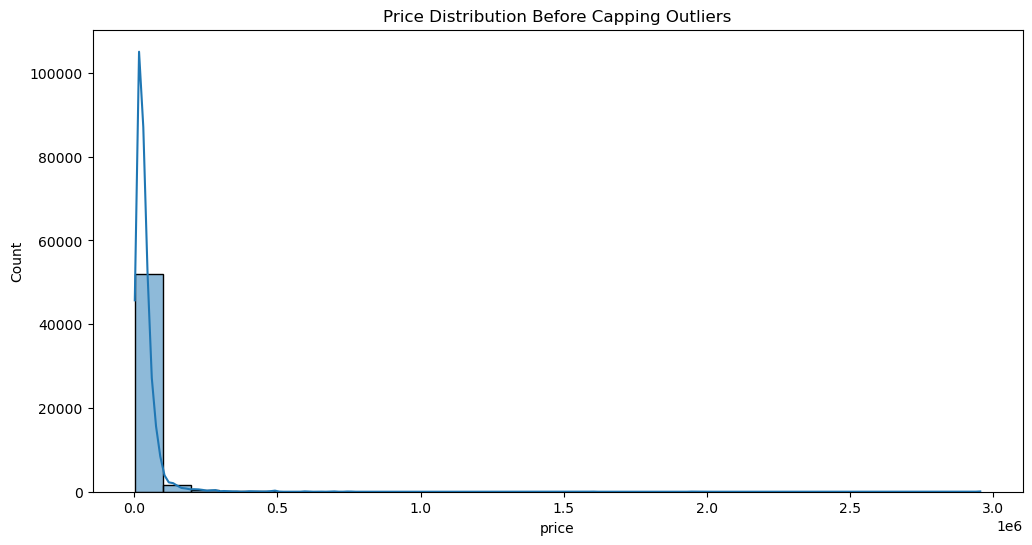

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


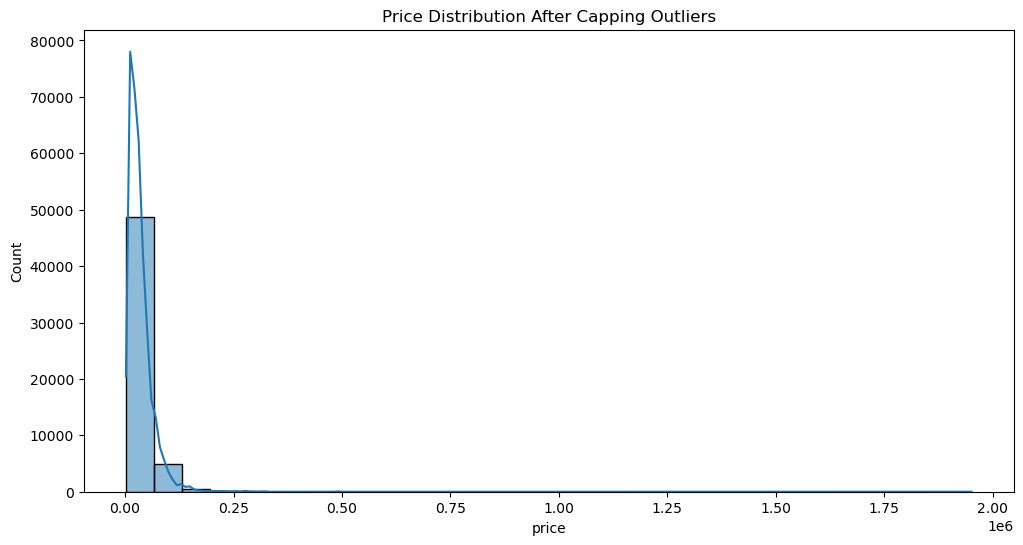

          id  brand                          model  model_year  milage  \
0        410  Acura         TLX Type S PMC Edition           1   13600   
1        721  Acura         TLX Type S PMC Edition           1   15500   
2       3427  Acura         TLX Type S PMC Edition           1    6900   
3       4939  Acura  TLX Type S w/Performance Tire           1    4200   
4       7920  Acura                    TLX V6 Tech           1   13600   
...      ...    ...                            ...         ...     ...   
54268  28930  Volvo                      850 Turbo          29  111000   
54269  29729  Volvo                      850 Turbo          29   94000   
54270  29732  Volvo                      850 Turbo          29   94653   
54271  30896  Volvo                      850 Turbo          29   94000   
54272  38955  Volvo                      850 Turbo          29   94000   

                                              engine  transmission  \
0      355.0HP 3.0L V6 Cylinder Engine Ga

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df


# Visualizing the distribution before and after capping outliers
def plot_distribution(df, column, title):
    plt.figure(figsize=(12, 6))
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(title)
    plt.show()


# Plot distribution of price before capping
plot_distribution(train_df, 'price', 'Price Distribution Before Capping Outliers')

# Grouping by brand and year and capping outliers in the price column
capped_df = train_df.groupby(['brand', 'model_year']).apply(lambda x: cap_outliers(x, 'price')).reset_index(drop=True)

# Plot distribution of price after capping
plot_distribution(capped_df, 'price', 'Price Distribution After Capping Outliers')

# Display the capped dataframe
print(capped_df)


In [73]:
# head of the capped_df
print(capped_df.head())
print(test_df.head())

     id  brand                          model  model_year  milage  \
0   410  Acura         TLX Type S PMC Edition           1   13600   
1   721  Acura         TLX Type S PMC Edition           1   15500   
2  3427  Acura         TLX Type S PMC Edition           1    6900   
3  4939  Acura  TLX Type S w/Performance Tire           1    4200   
4  7920  Acura                    TLX V6 Tech           1   13600   

                                          engine  transmission       accident  \
0  355.0HP 3.0L V6 Cylinder Engine Gasoline Fuel  10-Speed A/T  None reported   
1  355.0HP 3.0L V6 Cylinder Engine Gasoline Fuel           A/T  None reported   
2  290.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   9-Speed A/T  None reported   
3  355.0HP 3.0L V6 Cylinder Engine Gasoline Fuel  10-Speed A/T  None reported   
4  290.0HP 3.5L V6 Cylinder Engine Gasoline Fuel  10-Speed A/T  None reported   

     price  
0  60000.0  
1  44000.0  
2  35500.0  
3  85000.0  
4  39500.0  
      id          br

In [75]:
#add a new column to the test_df dataset name'price' with a value of 0. 
test_df['price'] = 0
print(test_df.head())

      id          brand                                              model  \
0  54273  Mercedes-Benz                                      E-Class E 350   
1  54274          Lexus                                        RX 350 Base   
2  54275  Mercedes-Benz                                      C-Class C 300   
3  54276           Land  Rover Range Rover 5.0L Supercharged Autobiogra...   
4  54277            BMW                                       X6 xDrive40i   

   model_year  milage                                             engine  \
0          10   73000      302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
1           9  128032      275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
2           9   51983       241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   
3           6   29500       518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4           4   90000  335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...   

                     transmission                                accident 

In [77]:
#save the capped_df to a csv file name train_capped.csv
capped_df.to_csv('/Users/donglinxiong/Documents/i-drive/Desktop/kagglex-cohort4/train_capped.csv', index=False)
#save the test_df to a csv file name test_capped.csv
test_df.to_csv('/Users/donglinxiong/Documents/i-drive/Desktop/kagglex-cohort4/test_capped.csv', index=False)

# to do list for the next  cells
# 1. Load the train_capped.csv and test_capped.csv datasets
# 2. Encode the categorical columns in the datasets
# 3. keep original columns and variables in columns in test_capped.csv, modify variables in train_capped.csv to have exact same variables  in test_capped.csv. price column should keep as it is in train_capped.csv. 
# 4. Add two new columns to the train_capped.csv and test_capped dataset: price/year and price/mileage, where price/year = price/model_year and price/mileage = price/mileage
# 5. Train a model to predict the price of the cars
# 5. Predict the price of the cars in the test dataset
# 6. Save the predicted prices to a csv file keep the original columns and rows in the test dataset

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Replace zero values in model_year and milage with a small number to avoid division by zero
train_df_encoded['model_year'].replace(0, 0.1, inplace=True)
train_df_encoded['milage'].replace(0, 0.1, inplace=True)
test_df_encoded['model_year'].replace(0, 0.1, inplace=True)
test_df_encoded['milage'].replace(0, 0.1, inplace=True)

# Add new columns to the training dataset
train_df_encoded['price/year'] = train_df_encoded['price'] / train_df_encoded['model_year']
train_df_encoded['price/mileage'] = train_df_encoded['price'] / train_df_encoded['milage']

# Prepare the data
X = train_df_encoded.drop(columns=['price'])
y = train_df_encoded['price']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the validation set
y_pred_val = model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred_val)
r2 = r2_score(y_val, y_pred_val)
print(f'Validation Mean Squared Error: {mse}')
print(f'Validation R-squared: {r2}')

# Add corresponding columns to the test dataset using placeholders
test_df_encoded['price/year'] = np.nan
test_df_encoded['price/mileage'] = np.nan

# Prepare the test data
X_test = test_df_encoded.drop(columns=['price', 'predicted_price'], errors='ignore')

# Predict on the test set
test_predictions = model.predict(X_test)

# Add predicted price to test dataset
test_df_encoded['predicted_price'] = test_predictions

# Update the test dataset with the new features using the predicted prices
test_df_encoded['predicted_price/year'] = test_df_encoded['predicted_price'] / test_df_encoded['model_year']
test_df_encoded['predicted_price/mileage'] = test_df_encoded['predicted_price'] / test_df_encoded['milage']

# Display the first few rows of the test dataframe with predictions
print(test_df_encoded.head())

#save the test_df_encoded to a csv file name test_predicted.csv
test_df_encoded.to_csv('/Users/donglinxiong/Documents/i-drive/Desktop/kagglex-cohort4/test_predicted.csv', index=False)
#save the train_df_encoded to a csv file name train_predicted.csv
train_df_encoded.to_csv('/Users/donglinxiong/Documents/i-drive/Desktop/kagglex-cohort4/train_predicted.csv',
                        index=False)

Validation Mean Squared Error: 24954368.68838846
Validation R-squared: 0.9915077883796913


ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Replace zero values in model_year and milage with a small number to avoid division by zero
train_df_encoded['model_year'].replace(0, 0.1, inplace=True)
train_df_encoded['milage'].replace(0, 0.1, inplace=True)
test_df_encoded['model_year'].replace(0, 0.1, inplace=True)
test_df_encoded['milage'].replace(0, 0.1, inplace=True)

# Add new columns to the training dataset
train_df_encoded['price/year'] = train_df_encoded['price'] / train_df_encoded['model_year']
train_df_encoded['price/mileage'] = train_df_encoded['price'] / train_df_encoded['milage']

# Prepare the data
X = train_df_encoded.drop(columns=['price'])
y = train_df_encoded['price']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = HistGradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on the validation set
y_pred_val = model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred_val)
r2 = r2_score(y_val, y_pred_val)
print(f'Validation Mean Squared Error: {mse}')
print(f'Validation R-squared: {r2}')

# Add corresponding columns to the test dataset using placeholders
test_df_encoded['price/year'] = np.nan
test_df_encoded['price/mileage'] = np.nan

# Prepare the test data
X_test = test_df_encoded.drop(columns=['predicted_price'], errors='ignore')

# Predict on the test set
test_predictions = model.predict(X_test)

# Add predicted price to test dataset
test_df_encoded['predicted_price'] = test_predictions

# Update the test dataset with the new features using the predicted prices
test_df_encoded['predicted_price/year'] = test_df_encoded['predicted_price'] / test_df_encoded['model_year']
test_df_encoded['predicted_price/mileage'] = test_df_encoded['predicted_price'] / test_df_encoded['milage']

# Display the first few rows of the test dataframe with predictions
print(test_df_encoded.head())


Validation Mean Squared Error: 345337737.13746125
Validation R-squared: 0.8824782473613746


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- predicted_price/mileage
- predicted_price/year


In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_iter': [100, 200, 300],
    'max_leaf_nodes': [31, 50, 100],
    'min_samples_leaf': [20, 50, 100]
}

# Initialize the model
model = HistGradientBoostingRegressor(random_state=42)

# Initialize Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2,
                           n_jobs=-1)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Best parameters and best score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation MSE: {-grid_search.best_score_}')

# Train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_val = best_model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred_val)
r2 = r2_score(y_val, y_pred_val)
print(f'Validation Mean Squared Error: {mse}')
print(f'Validation R-squared: {r2}')

# Predict on the test set
test_predictions = best_model.predict(X_test)

# Add predicted price to test dataset
test_df_encoded['predicted_price'] = test_predictions

# Update the test dataset with the new features using the predicted prices
test_df_encoded['predicted_price/year'] = test_df_encoded['predicted_price'] / test_df_encoded['model_year']
test_df_encoded['predicted_price/mileage'] = test_df_encoded['predicted_price'] / test_df_encoded['milage']

# Display the first few rows of the test dataframe with predictions
print(test_df_encoded.head())


Fitting 3 folds for each of 81 candidates, totalling 243 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Best parameters: {'learning_rate': 0.2, 'max_iter': 100, 'max_leaf_nodes': 31, 'min_samples_leaf': 20}
Best cross-validation MSE: 765997089.4282652
Validation Mean Squared Error: 337425840.4854967
Validation R-squared: 0.8851707418710737
      id  brand  model  model_year  milage  engine  transmission  accident  \
0  54273     34    528        10.0   73000     544            33         1   
1  54274     26   1246         9.0  128032     410            26         1   
2  54275     34    317         9.0   51983     311            20         1   
3  54276     25   1318         6.0   29500     911            42         0   
4  54277      4   1710         4.0   90000     633            26         0   

   predicted_price  price/year  price/mileage  predicted_price/year  \
0     20544.585403         NaN            NaN           2054.458540   
1     21098.458341         NaN            NaN           2344.273149   
2     19306.494212         NaN            NaN           2145.166024   
3     143

In [45]:
# Install XGBoost if it's not already installed
!pip install xgboost

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Replace zero values in model_year and milage with a small number to avoid division by zero
train_df_encoded['model_year'].replace(0, 0.1, inplace=True)
train_df_encoded['milage'].replace(0, 0.1, inplace=True)
test_df_encoded['model_year'].replace(0, 0.1, inplace=True)
test_df_encoded['milage'].replace(0, 0.1, inplace=True)

# Add new columns to the training dataset
train_df_encoded['price/year'] = train_df_encoded['price'] / train_df_encoded['model_year']
train_df_encoded['price/mileage'] = train_df_encoded['price'] / train_df_encoded['milage']

# Prepare the data
X = train_df_encoded.drop(columns=['price'])
y = train_df_encoded['price']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_val = xgb_model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred_val)
r2 = r2_score(y_val, y_pred_val)
print(f'Validation Mean Squared Error: {mse}')
print(f'Validation R-squared: {r2}')

# Prepare the test data
X_test = test_df_encoded.drop(columns=['predicted_price'], errors='ignore')

# Predict on the test set
test_predictions = xgb_model.predict(X_test)

# Add predicted price to test dataset
test_df_encoded['predicted_price'] = test_predictions

# Update the test dataset with the new features using the predicted prices
test_df_encoded['predicted_price/year'] = test_df_encoded['predicted_price'] / test_df_encoded['model_year']
test_df_encoded['predicted_price/mileage'] = test_df_encoded['predicted_price'] / test_df_encoded['milage']

# Display the first few rows of the test dataframe with predictions
print(test_df_encoded.head())


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 10.4 MB/s eta 0:00:00 0:00:01
Validation Mean Squared Error: 565174739.7375674
Validation R-squared: 0.8076656014729159


ValueError: feature_names mismatch: ['id', 'brand', 'model', 'model_year', 'milage', 'engine', 'transmission', 'accident', 'price/year', 'price/mileage'] ['id', 'brand', 'model', 'model_year', 'milage', 'engine', 'transmission', 'accident', 'price/year', 'price/mileage', 'predicted_price/year', 'predicted_price/mileage']
training data did not have the following fields: predicted_price/mileage, predicted_price/year

In [46]:
# Install XGBoost if it's not already installed
!pip install xgboost

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Replace zero values in model_year and milage with a small number to avoid division by zero
train_df_encoded['model_year'].replace(0, 0.1, inplace=True)
train_df_encoded['milage'].replace(0, 0.1, inplace=True)
test_df_encoded['model_year'].replace(0, 0.1, inplace=True)
test_df_encoded['milage'].replace(0, 0.1, inplace=True)

# Add new columns to the training dataset
train_df_encoded['price/year'] = train_df_encoded['price'] / train_df_encoded['model_year']
train_df_encoded['price/mileage'] = train_df_encoded['price'] / train_df_encoded['milage']

# Prepare the data
X = train_df_encoded.drop(columns=['price'])
y = train_df_encoded['price']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_val = xgb_model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred_val)
r2 = r2_score(y_val, y_pred_val)
print(f'Validation Mean Squared Error: {mse}')
print(f'Validation R-squared: {r2}')

# Prepare the test data
X_test = test_df_encoded.drop(columns=['predicted_price'], errors='ignore')

# Predict on the test set
test_predictions = xgb_model.predict(X_test)

# Add predicted price to test dataset
test_df_encoded['predicted_price'] = test_predictions

# Update the test dataset with the new features using the predicted prices
test_df_encoded['predicted_price/year'] = test_df_encoded['predicted_price'] / test_df_encoded['model_year']
test_df_encoded['predicted_price/mileage'] = test_df_encoded['predicted_price'] / test_df_encoded['milage']

# Display the first few rows of the test dataframe with predictions
print(test_df_encoded.head())


Validation Mean Squared Error: 565174739.7375674
Validation R-squared: 0.8076656014729159


ValueError: feature_names mismatch: ['id', 'brand', 'model', 'model_year', 'milage', 'engine', 'transmission', 'accident', 'price/year', 'price/mileage'] ['id', 'brand', 'model', 'model_year', 'milage', 'engine', 'transmission', 'accident', 'price/year', 'price/mileage', 'predicted_price/year', 'predicted_price/mileage']
training data did not have the following fields: predicted_price/mileage, predicted_price/year

In [47]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 0.9]
}

# Initialize the model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Initialize Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error',
                           verbose=2, n_jobs=-1)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Best parameters and best score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best cross-validation MSE: {-grid_search.best_score_}')

# Train the model with the best parameters
best_xgb_model = grid_search.best_estimator_
best_xgb_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_val = best_xgb_model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred_val)
r2 = r2_score(y_val, y_pred_val)
print(f'Validation Mean Squared Error: {mse}')
print(f'Validation R-squared: {r2}')

# Predict on the test set
test_predictions = best_xgb_model.predict(X_test)

# Add predicted price to test dataset
test_df_encoded['predicted_price'] = test_predictions

# Update the test dataset with the new features using the predicted prices
test_df_encoded['predicted_price/year'] = test_df_encoded['predicted_price'] / test_df_encoded['model_year']
test_df_encoded['predicted_price/mileage'] = test_df_encoded['predicted_price'] / test_df_encoded['milage']

# Display the first few rows of the test dataframe with predictions
print(test_df_encoded.head())


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.7}
Best cross-validation MSE: 463196784.3647556
Validation Mean Squared Error: 347296372.2908291
Validation R-squared: 0.8818117049848841


ValueError: feature_names mismatch: ['id', 'brand', 'model', 'model_year', 'milage', 'engine', 'transmission', 'accident', 'price/year', 'price/mileage'] ['id', 'brand', 'model', 'model_year', 'milage', 'engine', 'transmission', 'accident', 'price/year', 'price/mileage', 'predicted_price/year', 'predicted_price/mileage']
training data did not have the following fields: predicted_price/mileage, predicted_price/year

In [50]:
from sklearn.model_selection import cross_val_score

# Initialize the best XGBoost model
best_xgb_model = xgb.XGBRegressor(
    learning_rate=0.1,
    max_depth=3,
    n_estimators=200,
    subsample=0.7,
    objective='reg:squarederror',
    random_state=42
)

# Perform cross-validation
cv_scores = cross_val_score(best_xgb_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
cv_std = cv_scores.std()

print(f'Cross-Validation MSE: {cv_mse}')
print(f'Cross-Validation MSE Std Dev: {cv_std}')


Cross-Validation MSE: 367104212.4197246
Cross-Validation MSE Std Dev: 269442318.48350406


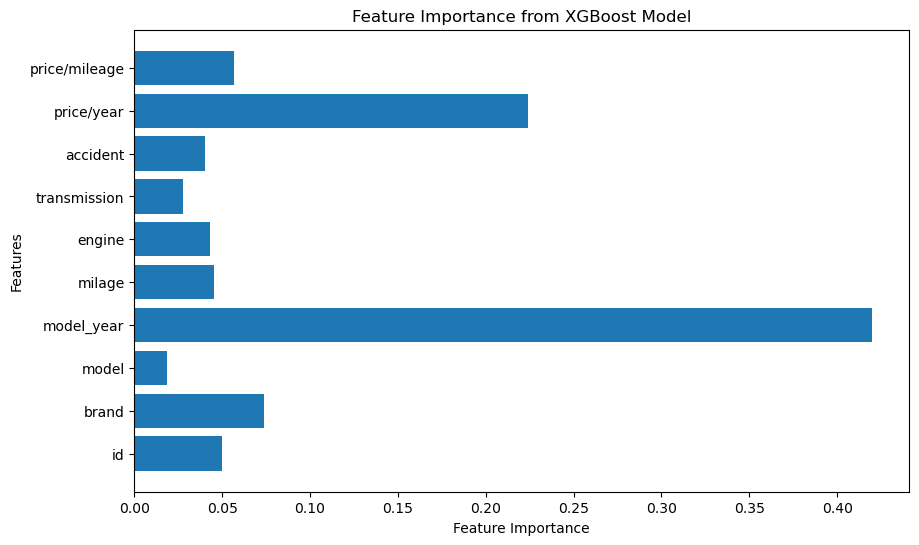

In [51]:
import matplotlib.pyplot as plt

# Fit the model on the entire training data
best_xgb_model.fit(X, y)

# Get feature importance
feature_importance = best_xgb_model.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from XGBoost Model')
plt.show()


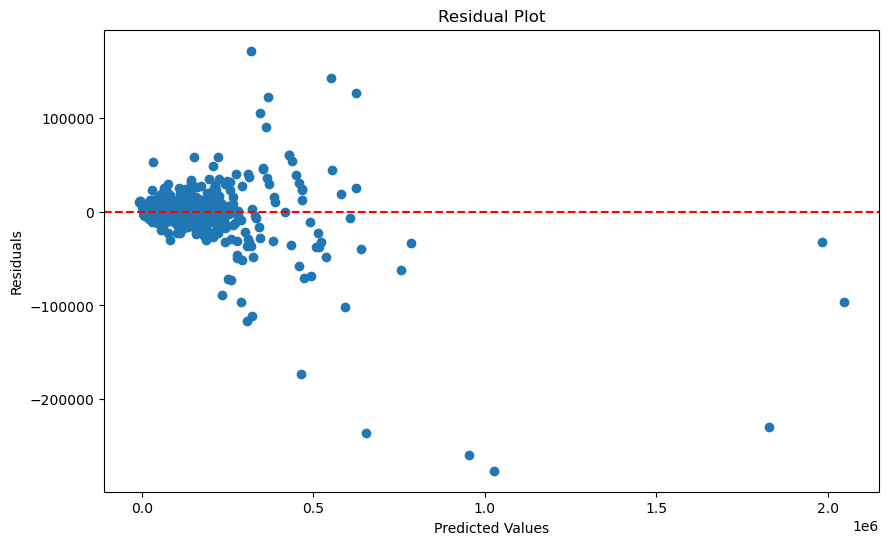

In [52]:
import matplotlib.pyplot as plt

# Predict on the validation set
y_pred_val = best_xgb_model.predict(X_val)

# Calculate residuals
residuals = y_val - y_pred_val

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_val, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()



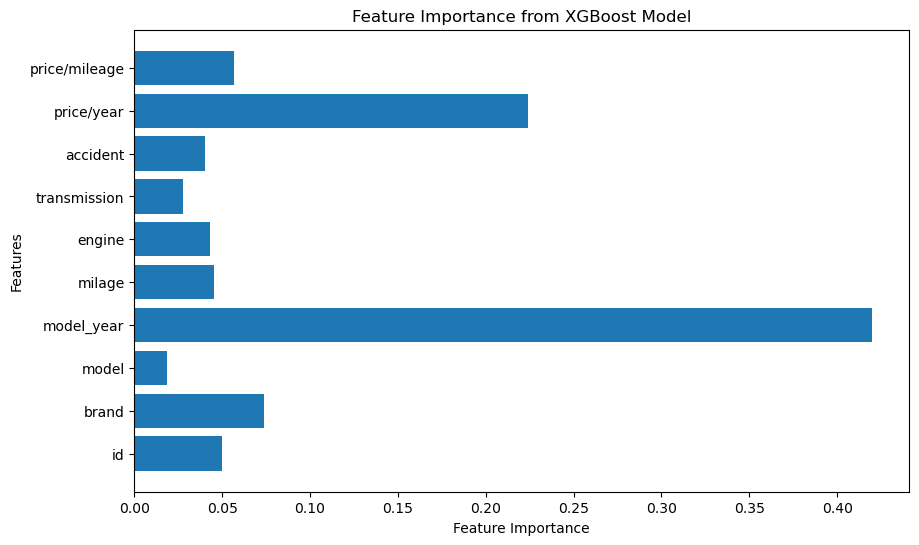

In [53]:
import matplotlib.pyplot as plt

# Initialize and train the best XGBoost model
best_xgb_model = xgb.XGBRegressor(
    learning_rate=0.1,
    max_depth=3,
    n_estimators=200,
    subsample=0.7,
    objective='reg:squarederror',
    random_state=42
)

# Fit the model on the entire training data
best_xgb_model.fit(X, y)

# Get feature importance
feature_importance = best_xgb_model.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from XGBoost Model')
plt.show()
